In [341]:
%matplotlib inline
main_path = '/Users/christian/Dropbox/McGill-publication/Papers/Multisite/'
path_out = main_path + 'figures/'

In [342]:
from matplotlib.pylab import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.gridspec as gridspec

def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None, label=''):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color, label=label, lw=2)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)
    
def load_file(path):
    mat = scipy.io.loadmat(path)
    return mat

def gen_fig(path_in, file_in,path_out, file_out, conn = 0, pvalidx=0):
    labels_box = ['H0 multi','H0 Dummy', 'H0 METAL']
    lw = 2
    mat = load_file(path_in + file_in)
    pvals = mat.get('list_p')[0]
    fig = plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    #ax.set_xticks(np.arange(0,1,0.1))
    #ax.set_yticks(np.arange(0,1.,0.1))
    plt.xlim(0,1.5)
    effect_size = np.arange(0.0, 1.501, 0.01)
    plt.ylabel('Detection power')
    plt.xlabel('Effect size (Cohen\'s d)')
    plt.plot(effect_size, mat.get('sens_monosite')[pvalidx,:,conn],label="Monosite", lw=lw, c='r')
    #plt.plot(effect_size, mat.get('sens_multisite_nocorr')[pvalidx,:,conn],label="Multisite no correction",lw=lw, c='k')
    plt.plot(effect_size, mat.get('sens_multisite_dummyvar')[pvalidx,:,conn],label="Multisite (7 sites)",lw=lw, c='b')
    #plt.plot(effect_size, mat.get('sens_multisite_metal')[pvalidx,:,conn],label="Multisite METAL",lw=lw, c='m')
    plt.grid(True)
    plt.title('p-value ' +  str(pvals[pvalidx]))
    
    # fully use the given bounding box.
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=4, mode="expand", borderaxespad=0.)
    plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
    # do the box plot
    plt.subplot(2, 2, 4)
    ax = fig.gca()
    #xtickNames = plt.setp(ax, xticklabels=np.repeat(labels_box, 1))
    #plt.setp(xtickNames, rotation=45, fontsize=12)
    plt.xlabel('Effect size (Cohen\'s d)')
    #h0_metal =  mat.get('sens_multisite_h0_metal')[pvalidx,:,conn]
    #h0_multi  = mat.get('sens_multisite_h0')[pvalidx,:,conn]
    h0_dummy  = np.mean(mat.get('sens_multisite_h0_dummy')[pvalidx,:,conn],axis=0)
    #boxplot((h0_multi,h0_dummy,h0_metal))
    boxplot((h0_dummy))
    ax.set_xticklabels(labels_box, rotation=0, ha='center')
    ax.set_yscale('log')
    ax.set_ylim((10**(-3),10**(0)))
    plt.ylabel('Detection power (log)')
    plt.title('H0 hypotheses')
    plt.tight_layout()
    #plt.savefig(path_out + file_out)
    #plt.show()

def gen_fig_allconn(path_in, file_in, path_out, file_out, conn=0, pvalidx=0, efflim=1.5):
    labels_box = ['H0 multi','H0 Dummy', 'H0 METAL']
    lw = 2
    mat = load_file(path_in + file_in)
    pvals = mat.get('list_p')[0]
    
    fig = plt.figure(figsize=(5,5))
    plt.subplot2grid((5,2), (1,0),colspan=2,rowspan=4)
    ax = fig.gca()
    #ax.set_xticks(np.arange(0,1,0.1))
    #ax.set_yticks(np.arange(0,1.,0.1))
    if efflim==2:
        plt.xlim(0,2)
        effect_size = np.arange(0.0, 2.001, 0.01)
    else:
        plt.xlim(0,1.5)
        effect_size = np.arange(0.0, 1.501, 0.01)
    
    plt.ylabel('Detection power')
    plt.xlabel('Effect size (Cohen\'s d)')
    ax.set_ylim((0,1))
    tmpdata = mat.get('sens_monosite')[pvalidx,:,:]
    errorfill(effect_size, tmpdata.mean(axis=1)[:len(effect_size)],tmpdata.std(axis=1)[:len(effect_size)],label="Monosite", color='r')
    #tmpdata = mat.get('sens_multisite_nocorr')[pvalidx,:,:]
    #errorfill(effect_size, tmpdata.mean(axis=1),tmpdata.std(axis=1),label="Multisite no correction", color='k')
    tmpdata = mat.get('sens_multisite_dummyvar')[pvalidx,:,:]
    errorfill(effect_size, tmpdata.mean(axis=1)[:len(effect_size)],tmpdata.std(axis=1)[:len(effect_size)],label="Multisite (7 sites)", color='b')
    #tmpdata = mat.get('sens_multisite_metal')[pvalidx,:,:]
    #errorfill(effect_size, tmpdata.mean(axis=1),tmpdata.std(axis=1),label="Multisite METAL", color='m')
    
    plt.grid(True)
    plt.title('p-value ' +  str(pvals[pvalidx]))
    
    # fully use the given bounding box.
    plt.legend(bbox_to_anchor=(0., 1.10, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.,frameon=False)
    #plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
    # do the box plot
    #plt.subplot2grid((7,2), (5,0),colspan=2,rowspan=2)
    #ax = fig.gca()
    ##xtickNames = plt.setp(ax, xticklabels=np.repeat(labels_box, 1))
    ##plt.setp(xtickNames, rotation=45, fontsize=12)
    #plt.xlabel('Effect size (cohen\'s d)')
    #h0_metal =  np.ndarray.flatten(np.mean(mat.get('sens_multisite_h0_metal')[pvalidx,:,:],axis=0))
    #h0_multi  = np.ndarray.flatten(np.mean(mat.get('sens_multisite_h0')[pvalidx,:,:],axis=0))
    #h0_dummy  = np.ndarray.flatten(np.mean(mat.get('sens_multisite_h0_dummy')[pvalidx,:,:],axis=0))
    ##boxplot((h0_multi,h0_dummy,h0_metal))
    #boxplot((h0_dummy))
    #ax.set_xticklabels(labels_box, rotation=0, ha='center')
    #ax.set_yscale('log')
    #ax.set_ylim((10**(-5),10**(0)))
    #plt.ylabel('Detection power (log)')
    #plt.title('H0 hypotheses')
    #plt.grid(True)
    print('monosite h0: ',np.mean(mat.get('sens_monosite_h0')[pvalidx,:,:]))
    plt.tight_layout()
    plt.savefig(path_out + file_out)
    

def gen_fig_full_sim(path_in, file_in,path_out, file_out):
    labels_box = ['H0 multi','H0 Dummy', 'H0 METAL']
    lw = 2
    mat = load_file(path_in + file_in)
    pvals = 0.001
    #fig = plt.figure(figsize=(5.5,7))
    fig = plt.figure(figsize=(5,5))
    plt.subplot2grid((5,2), (1,0),colspan=2,rowspan=4)
    ax = fig.gca()
    plt.xlim(0,1.5)
    effect_size = np.arange(0.0, 1.501, 0.01)
    ax.set_ylim((0,1))
    plt.ylabel('Detection power')
    plt.xlabel('Effect size (Cohen\'s d)')
    plt.plot(effect_size, mat.get('sens_mono'),label="Monosite",lw=lw, color='r')
    #plt.plot(effect_size, mat.get('sens_multi'),label="Multisite no correction",lw=lw, c='k')
    plt.plot(effect_size, mat.get('sens_multi_dummy'),label="Multisite (7 sites)",lw=lw, c='b')
    #plt.plot(effect_size, mat.get('sens_multi_metal'),label="Multisite METAL",lw=lw, c='m')
    plt.grid(True)
    plt.title('p-value ' +  str(pvals))
    
    # fully use the given bounding box.
    plt.legend(bbox_to_anchor=(0., 1.10, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.,frameon=False)
    ##plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
    ## do the box plot
    #plt.subplot2grid((7,2), (5,0),colspan=2,rowspan=2)
    #ax = plt.gca()
    ##ax = fig.gca()
    ##xtickNames = plt.setp(ax, xticklabels=np.repeat(labels_box, 1))
    ##plt.setp(xtickNames, rotation=45, fontsize=12)
    #plt.xlabel('Effect size (cohen\'s d)')
    ##h0_metal =  np.mean(mat.get('sens_multi_h0_metal'),axis=0)
    ##h0_multi  = np.mean(mat.get('sens_multi_h0'),axis=0)
    ##h0_dummy  = np.mean(mat.get('sens_multi_h0_dummy'),axis=0)
    ##boxplot((h0_multi,h0_dummy,h0_metal))
    #boxplot((h0_dummy))
    #ax.set_xticklabels(labels_box, rotation=0, ha='center')
    #ax.set_yscale('log')
    #ax.set_ylim((10**(-5),10**(0)))
    #plt.ylabel('Detection power (log)')
    #plt.title('H0 hypotheses')
    #plt.grid(True)
    print('monosite h0: ',np.mean(mat.get('sens_monosite_h0'),axis=0))
    plt.tight_layout()
    plt.savefig(path_out + file_out)
    ##plt.show()
    
def geteffectsize(path_in, file_in,mono=True,pidx=0):
    point_list = []
    mat = load_file(path_in + file_in)
    pvals = mat.get('list_p')[0]
    #print pvals
    if mono:
        pow_mask = mat.get('sens_monosite')[pidx]>=0.8 
    else:
        pow_mask = mat.get('sens_multisite_dummyvar')[pidx]>=0.8 
    
    for i in range(pow_mask.shape[1]):
        #print np.where(pow_mask[:,i])[0][0]
        point_list.append(mat.get('list_effect_size')[0][np.where(pow_mask[:,i])[0][0]])
    
    return np.mean(point_list),np.std(point_list)
#sens_monosite 
#sens_multisite_dummyvar 
    


((50,), (50,))
[[1 2]
 [3 4]]
[1 2 3 4]


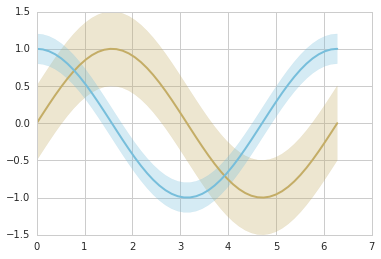

In [343]:
from scipy.interpolate import interp1d

import statsmodels.stats.power as pow
import pandas as pan
import math as math

plt.figure()
x = np.linspace(0, 2 * np.pi)
y_sin = np.sin(x)
y_cos = np.cos(x)
print(x.shape,y_cos.shape)
errorfill(x, y_sin, 0.5,'y')
errorfill(x, y_cos, 0.2,'c')

a = np.array([[1,2], [3,4]])
print a
print np.ndarray.flatten(a)




### alpha at 0.001 80% detection power

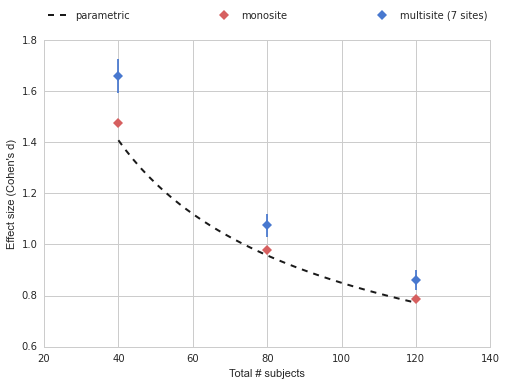

In [344]:
import seaborn; seaborn.set()
import seaborn as sns
sns.set_style("whitegrid")
sns.set_color_codes("muted")
 

path_tmp = main_path + 'figures/default_sim/samps_s40_50pct/'
m1,s1 = geteffectsize(path_tmp,'results_simu_power.mat',True)
path_tmp = main_path + 'figures/default_sim/samps_s80_50pct/'
m2,s2 = geteffectsize(path_tmp,'results_simu_power.mat',True) 
path_tmp = main_path + 'figures/default_sim/samps_s120_50pct/'
m3,s3 = geteffectsize(path_tmp,'results_simu_power.mat',True) 

path_tmp = main_path + 'figures/default_sim/samps_s40_50pct/'
mm1,sm1 = geteffectsize(path_tmp,'results_simu_power.mat',False) 
path_tmp = main_path + 'figures/default_sim/samps_s80_50pct/'
mm2,sm2 = geteffectsize(path_tmp,'results_simu_power.mat',False) 
path_tmp = main_path + 'figures/default_sim/samps_s120_50pct/'
mm3,sm3 = geteffectsize(path_tmp,'results_simu_power.mat',False)


yref=[]
x = np.linspace(40, 120, 3)
y = np.array([m1,m2,m3])
y2 = np.array([mm1,mm2,mm3])

f1 = interp1d(x, y, kind='linear')
f2 = interp1d(x, y2, kind='linear')

xnew = np.linspace(40, 120, 40)

for i in xnew:
    yref.append((pow.TTestIndPower().solve_power(nobs1=i/2, power=0.8, ratio=1, alpha=0.001)))
yref  = np.array(yref)

plt.figure()
plt.plot(xnew,yref,'k--',lw=2)

#plt.scatter(x,y,c="r",s=50)
#plt.scatter(x[1:],y2,c="b",s=50)
plt.errorbar(x, y, yerr=[s1,s2,s3], fmt='rD')
plt.errorbar(x, y2, yerr=[sm1,sm2,sm3], fmt='bD')

plt.legend(['parametric','monosite','multisite (7 sites)'],bbox_to_anchor=(0., 1.05, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.,frameon=False)
plt.xlabel('Total # subjects')
plt.ylabel('Effect size (Cohen\'s d)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([20,140])
plt.savefig(path_out + 'samplesize_effectsize_pow80_alpha001.png')

### alpha at 0.01 80% detection power

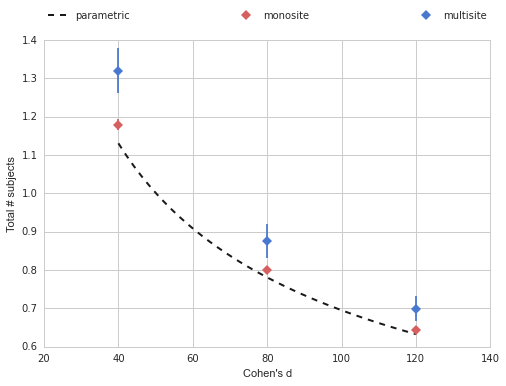

In [345]:

path_tmp = main_path + 'figures/default_sim/samps_s40_50pct/'
m1,s1 = geteffectsize(path_tmp,'results_simu_power.mat',True,1)
path_tmp = main_path + 'figures/default_sim/samps_s80_50pct/'
m2,s2 = geteffectsize(path_tmp,'results_simu_power.mat',True,1) 
path_tmp = main_path + 'figures/default_sim/samps_s120_50pct/'
m3,s3 = geteffectsize(path_tmp,'results_simu_power.mat',True,1) 

path_tmp = main_path + 'figures/default_sim/samps_s40_50pct/'
mm1,sm1 = geteffectsize(path_tmp,'results_simu_power.mat',False,1) 
path_tmp = main_path + 'figures/default_sim/samps_s80_50pct/'
mm2,sm2 = geteffectsize(path_tmp,'results_simu_power.mat',False,1) 
path_tmp = main_path + 'figures/default_sim/samps_s120_50pct/'
mm3,sm3 = geteffectsize(path_tmp,'results_simu_power.mat',False,1)

yref=[]
x = np.linspace(40, 120, 3)
y = np.array([m1,m2,m3])
y2 = np.array([mm1,mm2,mm3])

f1 = interp1d(x, y, kind='linear')
f2 = interp1d(x, y2, kind='linear')

xnew = np.linspace(40, 120, 40)

for i in xnew:
    yref.append((pow.TTestIndPower().solve_power(nobs1=i/2, power=0.8, ratio=1, alpha=0.01)))
yref  = np.array(yref)

plt.figure()
plt.plot(xnew,yref,'k--',lw=2)
#plt.scatter(x,y,c="r",s=50)
#plt.scatter(x,y2,c="b",s=50)
plt.errorbar(x, y, yerr=[s1,s2,s3], fmt='rD')
plt.errorbar(x, y2, yerr=[sm1,sm2,sm3], fmt='bD')
plt.legend(['parametric','monosite','multisite'],bbox_to_anchor=(0., 1.05, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.,frameon=False)
plt.ylabel('Total # subjects')
plt.xlabel('Cohen\'s d')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([20,140])

plt.savefig(path_out + 'samplesize_effectsize_pow80_alpha01.png')


### alpha at 0.05 80% detection power

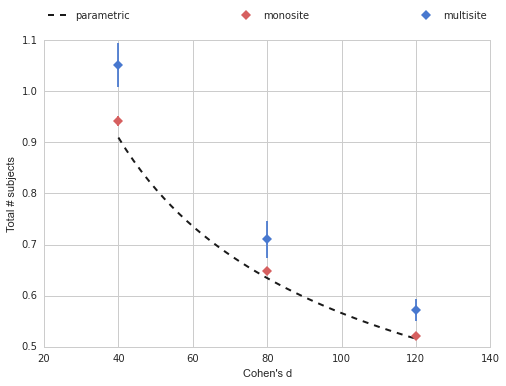

In [346]:

path_tmp = main_path + 'figures/default_sim/samps_s40_50pct/'
m1,s1 = geteffectsize(path_tmp,'results_simu_power.mat',True,2)
path_tmp = main_path + 'figures/default_sim/samps_s80_50pct/'
m2,s2 = geteffectsize(path_tmp,'results_simu_power.mat',True,2) 
path_tmp = main_path + 'figures/default_sim/samps_s120_50pct/'
m3,s3 = geteffectsize(path_tmp,'results_simu_power.mat',True,2) 

path_tmp = main_path + 'figures/default_sim/samps_s40_50pct/'
mm1,sm1 = geteffectsize(path_tmp,'results_simu_power.mat',False,2) 
path_tmp = main_path + 'figures/default_sim/samps_s80_50pct/'
mm2,sm2 = geteffectsize(path_tmp,'results_simu_power.mat',False,2) 
path_tmp = main_path + 'figures/default_sim/samps_s120_50pct/'
mm3,sm3 = geteffectsize(path_tmp,'results_simu_power.mat',False,2)

yref=[]
x = np.linspace(40, 120, 3)
y = np.array([m1,m2,m3])
y2 = np.array([mm1,mm2,mm3])

f1 = interp1d(x, y, kind='linear')
f2 = interp1d(x, y2, kind='linear')

xnew = np.linspace(40, 120, 40)

for i in xnew:
    yref.append((pow.TTestIndPower().solve_power(nobs1=i/2, power=0.8, ratio=1, alpha=0.05)))
yref  = np.array(yref)

plt.figure()
plt.plot(xnew,yref,'k--',lw=2)
#plt.scatter(x,y,c="r",s=50)
#plt.scatter(x,y2,c="b",s=50)
plt.errorbar(x, y, yerr=[s1,s2,s3], fmt='rD')
plt.errorbar(x, y2, yerr=[sm1,sm2,sm3], fmt='bD')
plt.legend(['parametric','monosite','multisite'],bbox_to_anchor=(0., 1.05, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.,frameon=False)
plt.ylabel('Total # subjects')
plt.xlabel('Cohen\'s d')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([20,140])

plt.savefig(path_out + 'samplesize_effectsize_pow80_alpha05.png')


In [347]:
np.linspace(0, 120, 4)

array([   0.,   40.,   80.,  120.])

# Figures for the real data

- 7 sites of ~20 subjects each, (real data)
- Balancing of pathology per site is 50%
- For each figure we vary the sample size from 40, 80 and 120 subjects

conn = 0
path_tmp = main_path + 'figures/samps_s40_50pct/'
for conn in range(9, 10):
    gen_fig(path_tmp,'results_simu_power.mat',path_tmp, 'detection_power.pdf',conn)

path_tmp = main_path + 'figures/samps_s80_50pct/'
for conn in range(9, 10):
    gen_fig(path_tmp,'results_simu_power.mat',path_tmp, 'detection_power.pdf',conn)

path_tmp = main_path + 'figures/samps_s120_50pct/'
for conn in range(9, 10):
    gen_fig(path_tmp,'results_simu_power.mat',path_tmp, 'detection_power.pdf',conn)


('monosite h0: ', 0.001012211668928087)
('monosite h0: ', 0.00099050203527815484)
('monosite h0: ', 0.00096426956128448668)


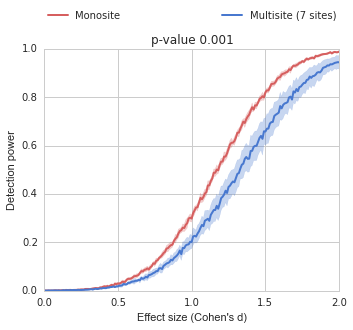

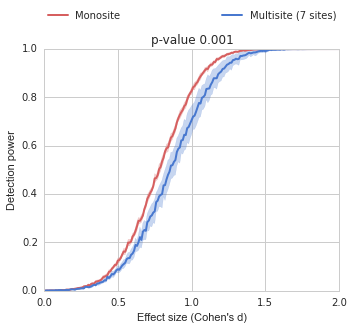

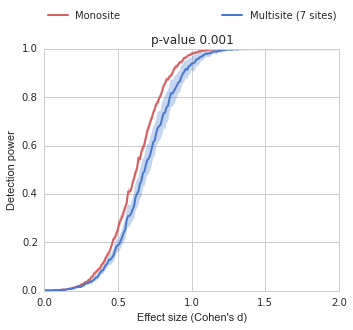

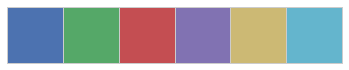

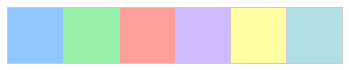

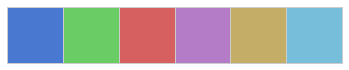

In [348]:


sns.set_color_codes('muted')
path_tmp = main_path + 'figures/default_sim/samps_s40_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s40_50pct.png',efflim=2)


path_tmp = main_path + 'figures/default_sim/samps_s80_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s80_50pct.png',efflim=2)


path_tmp = main_path + 'figures/default_sim/samps_s120_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s120_50pct.png',efflim=2)


current_palette = sns.color_palette()
sns.palplot(current_palette)

current_palette = sns.color_palette('pastel')
sns.palplot(current_palette)

current_palette = sns.color_palette('muted')
sns.palplot(current_palette)

## Figures for the real data

- 7 sites of ~20 subjects each, (real data)
- Balancing of pathology per site is:
    - Figure 1: 15% and 85%
    - Figure 2: 30% and 70%
    - Figure 3: 50% and 50%

('monosite h0: ', 0.0010104025327905925)
('monosite h0: ', 0.001046132971506106)
('monosite h0: ', 0.00099050203527815484)
('monosite h0: ', 0.0010194482134780645)
('monosite h0: ', 0.00098914518317503404)
('monosite h0: ', 0.00096426956128448668)


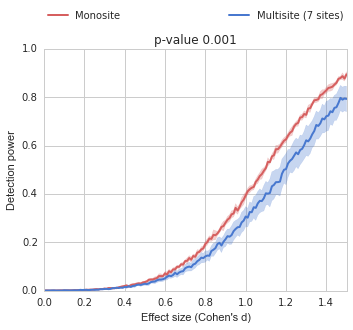

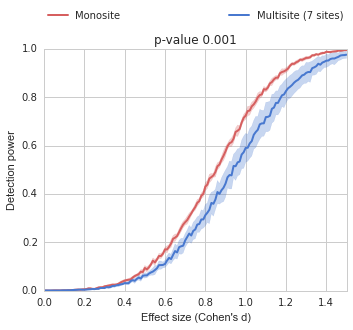

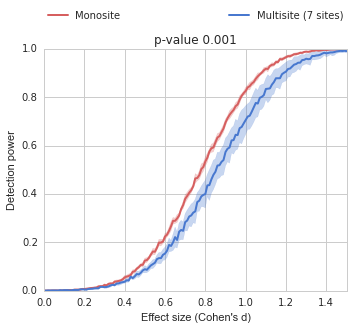

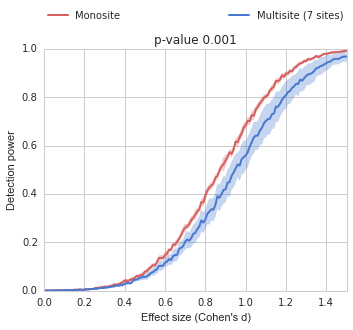

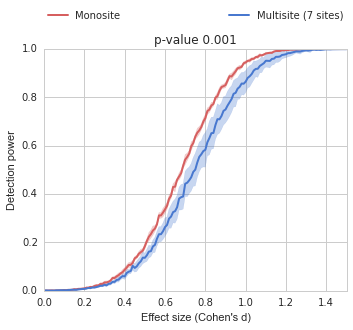

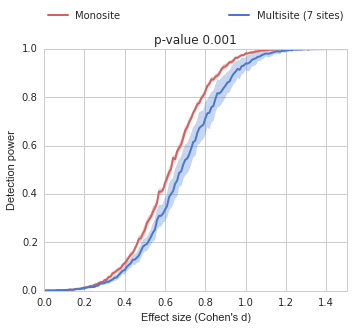

In [349]:

path_tmp = main_path + 'figures/default_sim/samps_s80_15pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s80_15pct.png')
    
path_tmp = main_path + 'figures/default_sim/samps_s80_30pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s80_30pct.png')
    
path_tmp = main_path + 'figures/default_sim/samps_s80_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s80_50pct.png')


path_tmp = main_path + 'figures/default_sim/samps_s120_15pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s120_15pct.png')
    
path_tmp = main_path + 'figures/default_sim/samps_s120_30pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s120_30pct.png')
    
path_tmp = main_path + 'figures/default_sim/samps_s120_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_s120_50pct.png')



# Figures for the real data with site effect in patho

- 7 sites of ~20 subjects each for a total of 120 subjects, (real data)
- Effect of the site in relationship with the pathology (2x the effect on site 1 and 1/2 the effect on site 2)
- Balancing of pathology per site is:
    - Figure 1: 15% and 85%
    - Figure 2: 30% and 70%
    - Figure 3: 50% and 50%

('monosite h0: ', 0.0010204695966285371)
('monosite h0: ', 0.0010632149307645998)
('monosite h0: ', 0.00096869355809753158)
('monosite h0: ', 0.0010054184226369657)
('monosite h0: ', 0.00098494882600842879)
('monosite h0: ', 0.00095364238410596035)


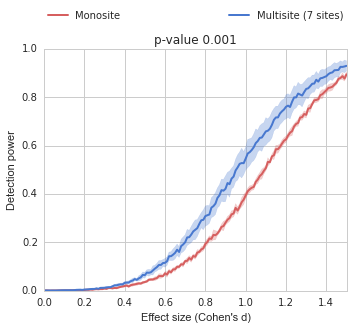

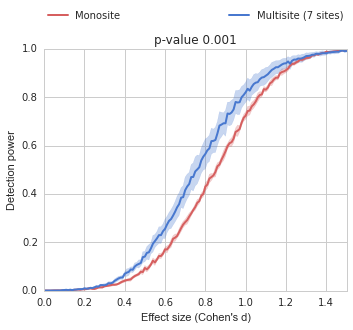

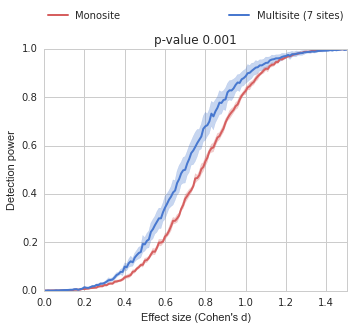

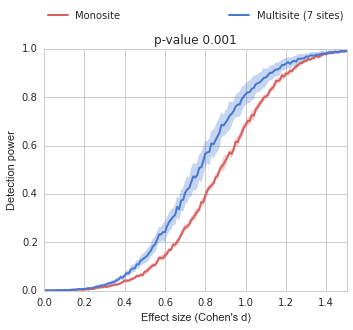

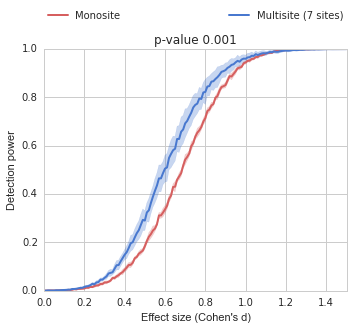

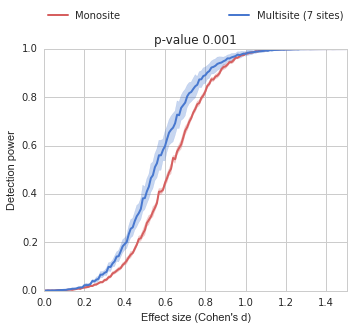

In [350]:
path_tmp = main_path + 'figures/sim_site_patho/samps_s80_15pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s80_15pct.png')
path_tmp = main_path + 'figures/sim_site_patho/samps_s80_30pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s80_30pct.png')
path_tmp = main_path + 'figures/sim_site_patho/samps_s80_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s80_50pct.png')

path_tmp = main_path + 'figures/sim_site_patho/samps_s120_15pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s120_15pct.png')
path_tmp = main_path + 'figures/sim_site_patho/samps_s120_30pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s120_30pct.png')
path_tmp = main_path + 'figures/sim_site_patho/samps_s120_50pct/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho_s120_50pct.png')

## Real data simulation 2 sites unbalanced

path_tmp = main_path + 'figures/2sites_realdata/samps_s33_70_30_2site/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho2site_s33_70pct.pdf')
path_tmp = main_path + 'figures/2sites_realdata/samps_s33_30_70_2site/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho2site_s33_30pct.pdf')

('monosite h0: ', 0.00098193859121011463)
('monosite h0: ', 0.00099819385912101161)


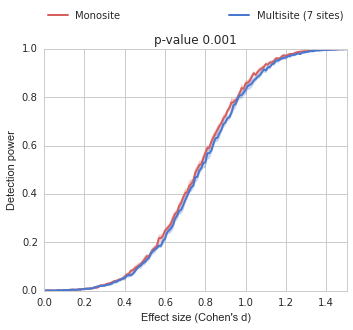

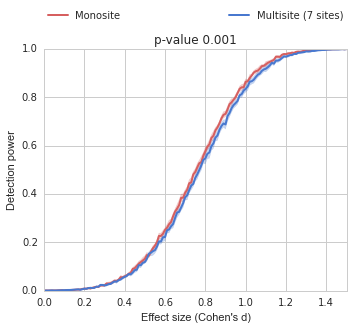

In [351]:

path_tmp = main_path + 'figures/2sites_realdata/samps_s100_30_70_2site/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho2site_s100_30pct.png')
path_tmp = main_path + 'figures/2sites_realdata/samps_s100_70_30_2site/'
gen_fig_allconn(path_tmp,'results_simu_power.mat',path_out, 'realdata_detect_pow_sitepatho2site_s100_70pct.png')

# Figures for full simulations

## Balanced sites 50/50

- 2 sites of 50 subjects each,
- Balancing of pathology per site is 50% and 50%

('monosite h0: ', array([ 0.001]))
('monosite h0: ', array([ 0.00098675]))
('monosite h0: ', array([ 0.00102649]))
('monosite h0: ', array([ 0.00099338]))


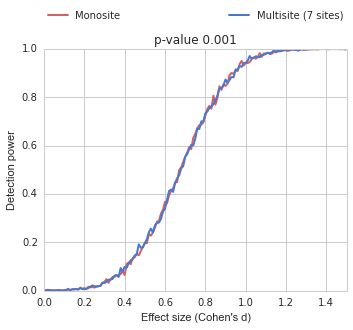

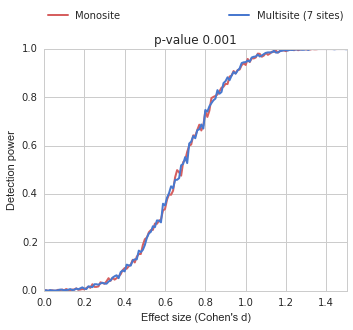

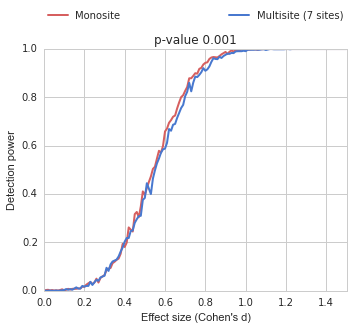

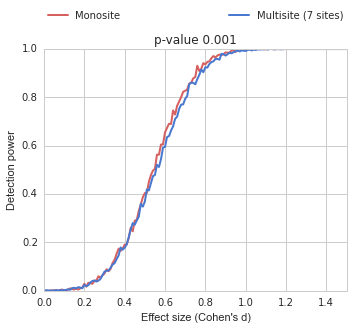

In [352]:
path_tmp = main_path + 'figures/'

gen_fig_full_sim(path_tmp,'simu_bal5050_var0_site0.mat',path_tmp, 'detect_pow_bal5050_var0_site0.png')
gen_fig_full_sim(path_tmp,'simu_bal5050_var0_site05.mat',path_tmp, 'detect_pow_bal5050_var0_site05.png')
gen_fig_full_sim(path_tmp,'simu_bal5050_var2_site0.mat',path_tmp, 'detect_pow_bal5050_var2_site0.png')
gen_fig_full_sim(path_tmp,'simu_bal5050_var2_site05.mat',path_tmp, 'detect_pow_bal5050_var2_site05.png')

## Unbalanced site 70/30

- 2 sites of 50 subjects each,
- Balancing of pathology per site is 70% and 30%

('monosite h0: ', array([ 0.00102649]))
('monosite h0: ', array([ 0.0011457]))
('monosite h0: ', array([ 0.00102649]))
('monosite h0: ', array([ 0.00095364]))


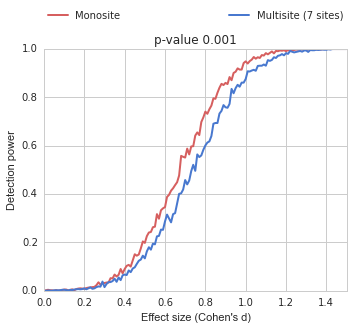

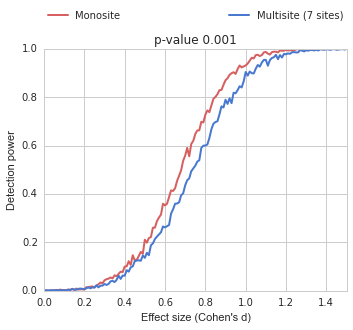

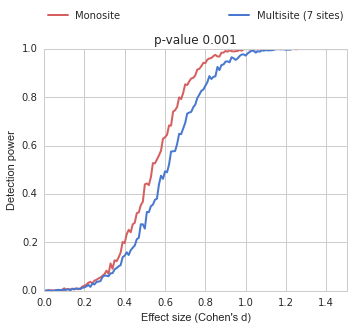

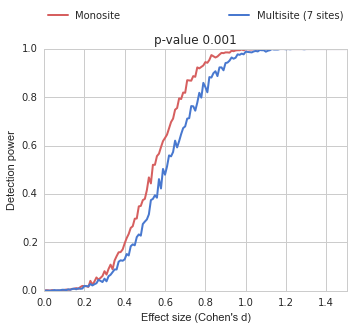

In [353]:
path_tmp = main_path + 'figures/'
gen_fig_full_sim(path_tmp,'simu_bal7030_var0_site0.mat',path_tmp, 'detect_pow_bal7030_var0_site0.png')
gen_fig_full_sim(path_tmp,'simu_bal7030_var0_site05.mat',path_tmp, 'detect_pow_bal7030_var0_site05.png')
gen_fig_full_sim(path_tmp,'simu_bal7030_var2_site0.mat',path_tmp, 'detect_pow_bal7030_var2_site0.png')
gen_fig_full_sim(path_tmp,'simu_bal7030_var2_site05.mat',path_tmp, 'detect_pow_bal7030_var2_site05.png')

## Unbalanced and sample size difference

- 2 sites of 20 subjects and 80 subjects,
- Balancing of pathology per site is 50% and 50%
- Effect of the site in relationship with the pathology (2x the effect on site 1 and 1/2 the effect on site 2)

('monosite h0: ', array([ 0.00090066]))
('monosite h0: ', array([ 0.00090066]))
('monosite h0: ', array([ 0.00090728]))
('monosite h0: ', array([ 0.00094702]))


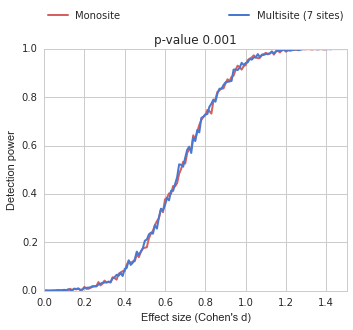

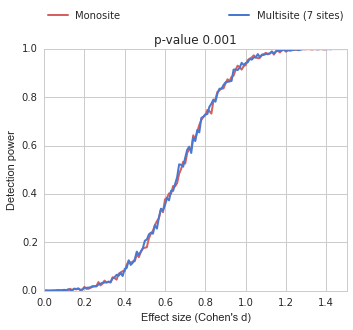

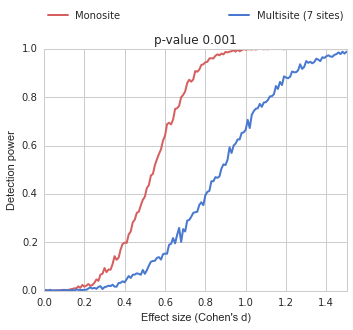

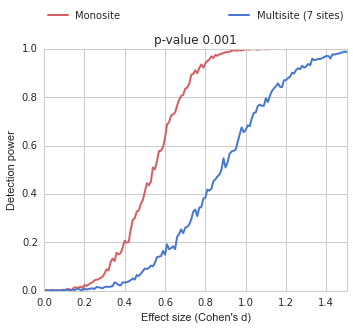

In [354]:
path_tmp = main_path + 'figures/'
gen_fig_full_sim(path_tmp,'simu_2080bal5050_var0_site0.mat',path_tmp, 'detect_pow_2080bal5050_var0_site0.png')
gen_fig_full_sim(path_tmp,'simu_2080bal5050_var0_site05.mat',path_tmp, 'detect_pow_2080bal5050_var0_site05.png')
gen_fig_full_sim(path_tmp,'simu_2080bal5050_var2_site0.mat',path_tmp, 'detect_pow_2080bal5050_var2_site0.png')
gen_fig_full_sim(path_tmp,'simu_2080bal5050_var2_site05.mat',path_tmp, 'detect_pow_2080bal5050_var2_site05.png')


- 2 sites of 20 subjects and 80 subjects,
- Balancing of pathology per site is 70% and 30%
- Effect of the site in relationship with the pathology (2x the effect on site 1 and 1/2 the effect on site 2)

('monosite h0: ', array([ 0.00113245]))
('monosite h0: ', array([ 0.00092715]))
('monosite h0: ', array([ 0.00093377]))
('monosite h0: ', array([ 0.00107285]))
('monosite h0: ', array([ 0.0010596]))
('monosite h0: ', array([ 0.00098013]))
('monosite h0: ', array([ 0.00088742]))
('monosite h0: ', array([ 0.00107947]))


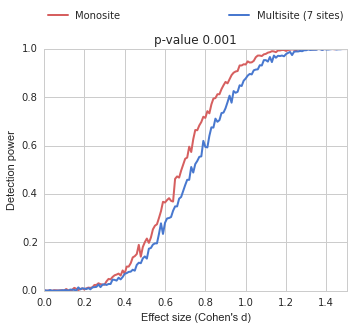

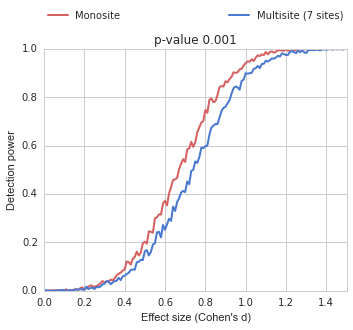

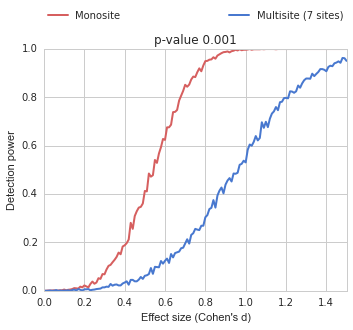

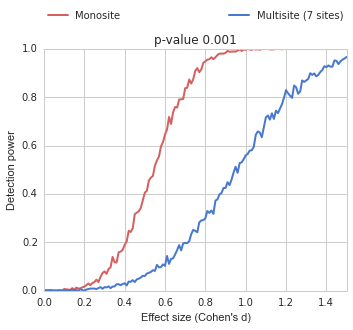

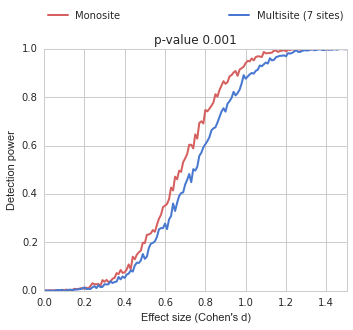

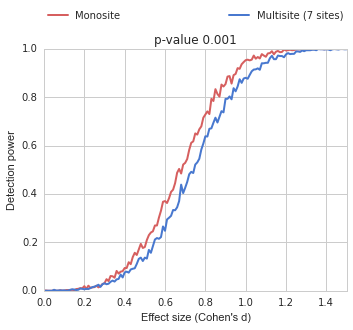

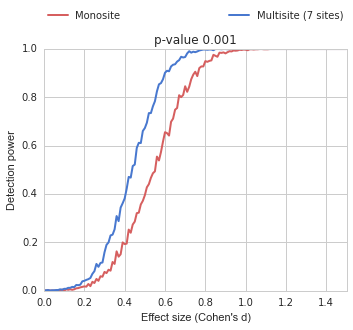

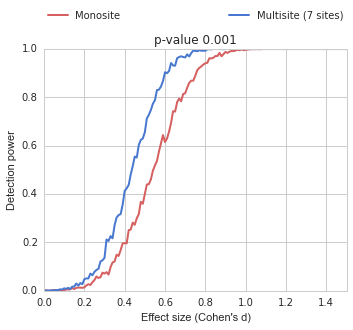

In [355]:
path_tmp = main_path + 'figures/'

gen_fig_full_sim(path_tmp,'simu_2080bal7030_var0_site0.mat',path_tmp, 'detect_pow_2080bal7030_var0_site0.png')
gen_fig_full_sim(path_tmp,'simu_2080bal7030_var0_site05.mat',path_tmp, 'detect_pow_2080bal7030_var0_site05.png')
gen_fig_full_sim(path_tmp,'simu_2080bal7030_var2_site0.mat',path_tmp, 'detect_pow_2080bal7030_var2_site0.png')
gen_fig_full_sim(path_tmp,'simu_2080bal7030_var2_site05.mat',path_tmp, 'detect_pow_2080bal7030_var2_site05.png')

gen_fig_full_sim(path_tmp,'simu_8020bal7030_var0_site0.mat',path_tmp, 'detect_pow_8020bal7030_var0_site0.png')
gen_fig_full_sim(path_tmp,'simu_8020bal7030_var0_site05.mat',path_tmp, 'detect_pow_8020bal7030_var0_site05.png')
gen_fig_full_sim(path_tmp,'simu_8020bal7030_var2_site0.mat',path_tmp, 'detect_pow_8020bal7030_var2_site0.png')
gen_fig_full_sim(path_tmp,'simu_8020bal7030_var2_site05.mat',path_tmp, 'detect_pow_8020bal7030_var2_site05.png')


# Pharma setup
## 50 

('monosite h0: ', array([ 0.00090728]))
('monosite h0: ', array([ 0.00098013]))
('monosite h0: ', array([ 0.00093377]))
('monosite h0: ', array([ 0.00093377]))
('monosite h0: ', array([ 0.00091391]))


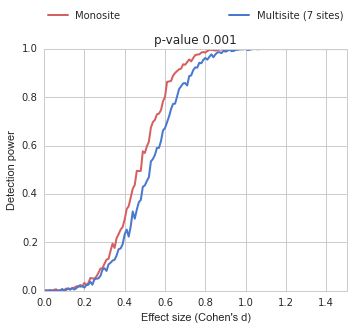

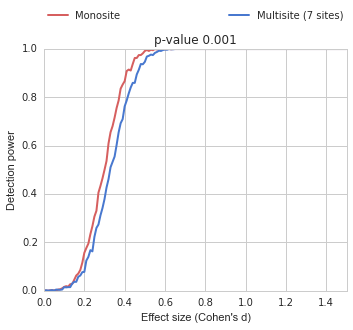

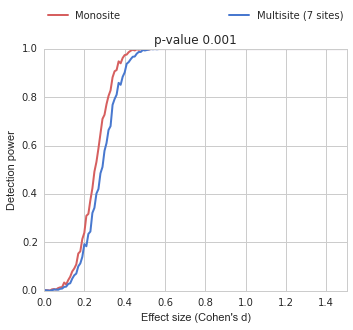

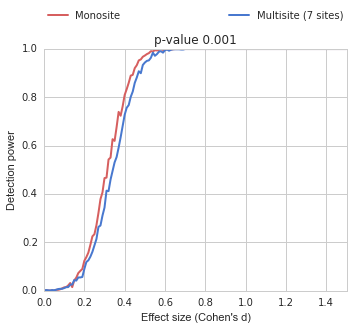

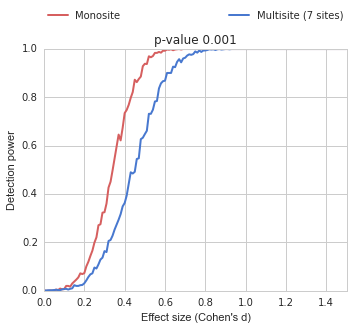

In [356]:
path_tmp = main_path + 'figures/'

gen_fig_full_sim(path_tmp,'simu_10subj_20sites_rndbal1090_var0_site05.mat',path_tmp, 'detect_pow_10subj_20sites_rndbal1090_var0_site05.png')
gen_fig_full_sim(path_tmp,'simu_10subj_50sites_rndbal1090_var0_site05.mat',path_tmp, 'detect_pow_10subj_50sites_rndbal1090_var0_site05.png')
gen_fig_full_sim(path_tmp,'simu_rndsubj0520_50sites_rndbal1090_var0_site05.mat',path_tmp, 'detect_pow_rndsubj0520_50sites_rndbal1090_var0_site05.png')
gen_fig_full_sim(path_tmp,'simu_rndsubj0215_50sites_rndbal1090_var0_siternd0005.mat',path_tmp, 'detect_pow_rndsubj0215_50sites_rndbal1090_var0_siternd0005.png')
gen_fig_full_sim(path_tmp,'simu_rndsubj0215_50sites_rndbal1090_varrnd02_siternd0005.mat',path_tmp, 'detect_pow_rndsubj0215_50sites_rndbal1090_varrnd02_siternd0005.png')

In [357]:
aa = load_file(path_tmp + 'simu_10subj_20sites_rndbal1090_var0_site05.mat')

In [358]:
aa.keys()
aa.get('sens_mono')

array([[ 0.   ],
       [ 0.002],
       [ 0.   ],
       [ 0.003],
       [ 0.   ],
       [ 0.004],
       [ 0.006],
       [ 0.001],
       [ 0.002],
       [ 0.002],
       [ 0.003],
       [ 0.009],
       [ 0.008],
       [ 0.004],
       [ 0.012],
       [ 0.012],
       [ 0.018],
       [ 0.016],
       [ 0.024],
       [ 0.018],
       [ 0.033],
       [ 0.024],
       [ 0.032],
       [ 0.053],
       [ 0.051],
       [ 0.05 ],
       [ 0.059],
       [ 0.074],
       [ 0.092],
       [ 0.093],
       [ 0.112],
       [ 0.129],
       [ 0.132],
       [ 0.165],
       [ 0.195],
       [ 0.177],
       [ 0.218],
       [ 0.234],
       [ 0.253],
       [ 0.264],
       [ 0.295],
       [ 0.338],
       [ 0.35 ],
       [ 0.386],
       [ 0.422],
       [ 0.438],
       [ 0.496],
       [ 0.495],
       [ 0.496],
       [ 0.577],
       [ 0.57 ],
       [ 0.597],
       [ 0.617],
       [ 0.675],
       [ 0.698],
       [ 0.707],
       [ 0.73 ],
       [ 0.733],
       [ 0.747

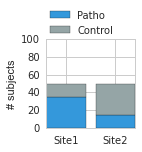

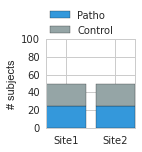

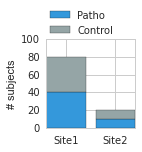

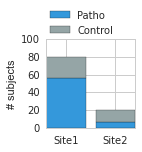

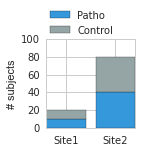

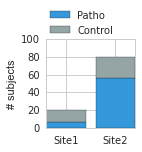

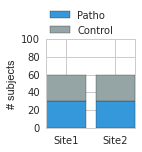

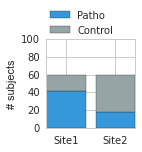

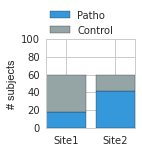

In [359]:
#color palette "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"
def plotpropbar(patho,ctrl):
    plt.figure(figsize=(2, 2))
    plt.subplot2grid((5,5), (1,1),colspan=4, rowspan=4)
    N = 2
    ind = np.arange(N)/4.    # the x locations for the groups
    width = 0.20       # the width of the bars: can also be len(x) sequence
    p1 = plt.bar(ind, patho,width, color='#3498db')
    p2 = plt.bar(ind, ctrl, width, color='#95a5a6',bottom=patho)

    plt.ylabel('# subjects')
    #plt.title('Scores by group and gender')

    plt.xticks(ind+width/2., ('Site1', 'Site2') )
    plt.yticks(np.arange(0,101,20))
    #plt.legend( (p1[0], p2[0]), ('Patho', 'CTRL') )
    plt.legend((p1[0], p2[0]), ('Patho', 'Control'),bbox_to_anchor=(0., 1.0, 1., .102), loc=3, ncol=1, borderaxespad=0.,frameon=False)

path_tmp = main_path + 'figures/'


# simulation data repartition
patho   = (35, 15)
ctrl = (15, 35)
plotpropbar(patho,ctrl)
plt.savefig(path_tmp + 'prop_5050subj_7030.png')

patho   = (25, 25)
ctrl = (25, 25)
plotpropbar(patho,ctrl)
plt.savefig(path_tmp + 'prop_5050subj_5050.png')

patho   = (40, 10)
ctrl = (40, 10)
plotpropbar(patho,ctrl)
plt.savefig(path_tmp + 'prop_8020subj_5050.png')

patho   = (56, 6)
ctrl    = (24, 14)
plotpropbar(patho,ctrl)
plt.savefig(path_tmp + 'prop_8020subj_7030.png')

patho   = (10, 40)
ctrl = (10, 40)
plotpropbar(patho,ctrl)
plt.savefig(path_tmp + 'prop_2080subj_5050.png')

patho   = (6, 56)
ctrl    = (14, 24)
plotpropbar(patho,ctrl)
plt.savefig(path_tmp + 'prop_2080subj_7030.png')

# real data repartition
patho   = (30, 30)
ctrl    = (30, 30)
plotpropbar(patho,ctrl)
plt.savefig(path_tmp + 'prop_real120subj_5050.png')

patho   = (42, 18)
ctrl    = (18, 42)
plotpropbar(patho,ctrl)
plt.savefig(path_tmp + 'prop_real120subj_7030.png')

patho   = (18, 42)
ctrl    = (42, 18)
plotpropbar(patho,ctrl)
plt.savefig(path_tmp + 'prop_real120subj_3070.png')